<a href="https://colab.research.google.com/github/shivtejshete/Computer-Vision/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os

In [2]:
print(tf.__version__)
print(keras.__version__)


2.3.0
2.4.3


In [3]:
#building the datapipeline 
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_path = tf.keras.utils.get_file('cats_dogs.zip', origin=url, extract=True)

path = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered' )

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

batch_size = 32
image_size = (160, 160)


68608000/68606236 [==============================] - 1s 0us/step


In [4]:
train_dataset = keras.preprocessing.image_dataset_from_directory(train_dir, batch_size=batch_size, image_size=image_size, shuffle=True, color_mode='rgb')

Found 2000 files belonging to 2 classes.


In [5]:
class_indices = train_dataset.class_names

In [6]:
validation_dataset = keras.preprocessing.image_dataset_from_directory(validation_dir, batch_size = batch_size, image_size = image_size, shuffle=True, color_mode='rgb')

Found 1000 files belonging to 2 classes.


0
1
1
0


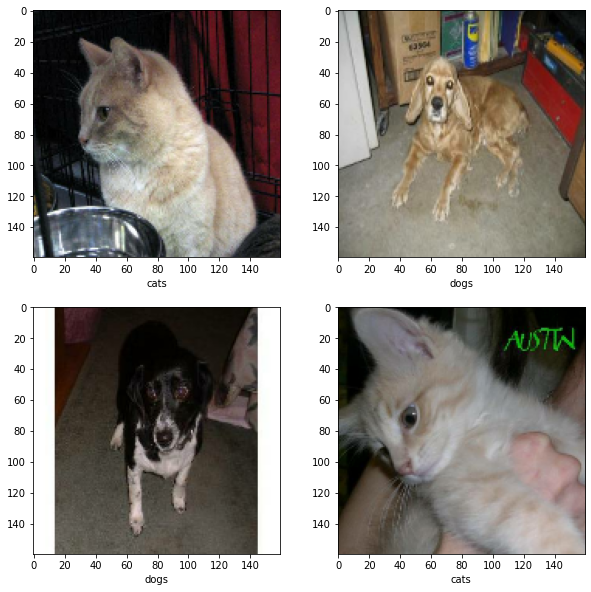

In [7]:
#plotting sample data from first batch of training dataset
plt.figure(figsize = (10,10))
for image, label in train_dataset.take(1):
  for i in range(4):
      ax= plt.subplot(2,2,i+1)
      plt.imshow(np.array(image[i], dtype= 'int'))
      plt.xlabel(class_indices[label[i]])
      tf.print(label[i])


In [8]:
#checking number of batches into validation dataset
value_batches = tf.data.experimental.cardinality(validation_dataset)

In [9]:
#creation of test data subset
test_dataset=validation_dataset.take(value_batches//5)
validation_dataset= validation_dataset.skip(value_batches//5)

In [11]:
#checking number of batches into training dataset
tf.print(tf.data.experimental.cardinality(train_dataset))

63


In [12]:
#he number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step.
#  You could either manually tune this value, or set it 
# to tf.data.experimental.AUTOTUNE which will prompt the tf.data runtime to tune the value dynamically at runtime.
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [13]:

#Prefetch the data for reducing latency and increase throughput 
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [15]:
#Augmentation layer, its no required if we use a generator from keras
augment = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2, seed=11),
    keras.layers.experimental.preprocessing.RandomFlip( seed=1),
    keras.layers.experimental.preprocessing.RandomContrast(factor = 0.1)
]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


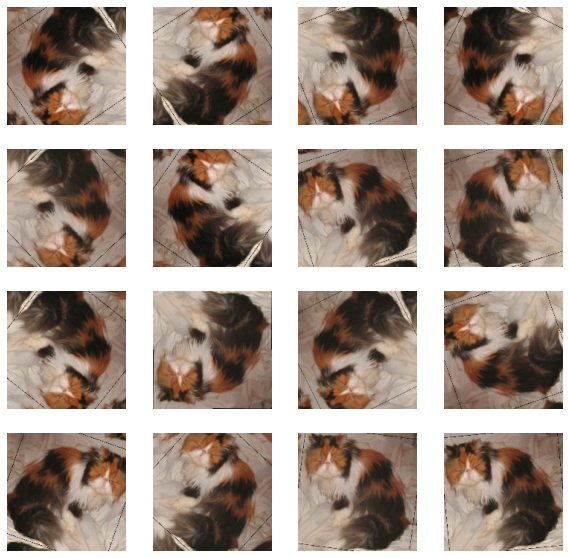

In [25]:
#visualize how data augmentation happens
for image, label in train_dataset.take(1):
  plt.figure(figsize=(10,10))
  image2 = image[1]
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    augmented = augment(np.expand_dims(image2, 0))
    plt.imshow(np.reshape(np.array(augmented, dtype = 'int'),(160,160,3)))
    plt.axis(False )

In [29]:
#MobileNetV2 has some preprocessing and we can access that specific layer directly to process our data in same fashion


tf.Tensor(
[[[0.68875    0.5983111  0.43775737]
  [0.6848039  0.5886573  0.4308701 ]
  [0.68874    0.5963986  0.436767  ]
  ...
  [0.69113976 0.62962013 0.48476714]
  [0.68844366 0.62888485 0.4781495 ]
  [0.72253674 0.6558701  0.48332107]]

 [[0.6700176  0.60294807 0.43452206]
  [0.6560501  0.584146   0.41813725]
  [0.65540206 0.586721   0.4191008 ]
  ...
  [0.67667896 0.61515933 0.47030637]
  [0.67607456 0.61651576 0.4657805 ]
  [0.7121009  0.64543426 0.47288528]]

 [[0.6667433  0.60791975 0.43929228]
  [0.6608456  0.60202205 0.4333946 ]
  [0.6633272  0.6045037  0.43587622]
  ...
  [0.6896293  0.6281097  0.48325673]
  [0.6919577  0.6323989  0.4816636 ]
  [0.70837164 0.641705   0.46915594]]

 ...

 [[0.44460785 0.62107843 0.50735295]
  [0.4632353  0.63186276 0.52205884]
  [0.48198912 0.6388519  0.53296953]
  ...
  [0.5113358  0.64552695 0.5294118 ]
  [0.5151961  0.64240193 0.5294118 ]
  [0.50686276 0.66771984 0.539411  ]]

 [[0.44460785 0.62107843 0.50735295]
  [0.4632353  0.63186276 0